In [16]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
import joblib



!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X,y = diabetes[features].values, diabetes[label].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

reg = 0.01
model = LogisticRegression(C=1/reg, solver='liblinear').fit(X_train, y_train)

predictions = model.predict(X_test)

print('Predicted labels: ', predictions)
print('Actual labels: ', y_test)

print('Accuracy: ', accuracy_score(y_test, predictions))


--2025-02-22 15:06:37--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 776415 (758K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>] 758.22K  --.-KB/s    in 0.04s   

2025-02-22 15:06:37 (20.2 MB/s) - ‘diabetes.csv.1’ saved [776415/776415]

Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:  [0 0 1 ... 1 1 1]
Accuracy:  0.7888888888888889


In [17]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



O relatório de classificação inclui as seguintes métricas para cada classe (0 e 1):

Observação: a linha do cabeçalho pode não se alinhar aos valores.
Precisão: das previsões que o modelo fez para esta classe, qual proporção estava correta?
Recall: de todas as instâncias desta classe no conjunto de dados de teste, quantas o modelo identificou?
Pontuação F1: uma métrica média que leva em consideração a precisão e o recall.
Suporte: quantas instâncias desta classe existem no conjunto de dados de teste?
O relatório de classificação também inclui médias para essas métricas, incluindo uma média ponderada que permite o desequilíbrio no número de casos de cada classe.

Como este é um problema de classificação binária, a classe 1 é considerada positiva e sua precisão e recall são particularmente interessantes - elas efetivamente respondem às perguntas:

De todos os pacientes que o modelo previu serem diabéticos, quantos são realmente diabéticos?
De todos os pacientes que são realmente diabéticos, quantos o modelo identificou?
Você pode recuperar esses valores por conta própria usando as métricas precision_score e recall_score no Scikit-Learn (que por padrão assumem um modelo de classificação binária).

In [18]:


print("Overral Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))

Overral Precision: 0.7231012658227848
Overall Recall: 0.6036988110964333


In [19]:


cm = confusion_matrix(y_test, predictions)
print(cm)

[[2636  350]
 [ 600  914]]


Até agora, consideramos as previsões do modelo como sendo rótulos de classe 1 ou 0. Na verdade, as coisas são um pouco mais complexas do que isso. Algoritmos estatísticos de aprendizado de máquina, como regressão logística, são baseados em probabilidade. O que realmente é previsto por um classificador binário é a probabilidade de que o rótulo seja verdadeiro (P(y)) e a probabilidade de que o rótulo seja falso (1 - P(y)). Um valor limite de 0,5 é usado para decidir se o rótulo previsto é 1 (P(y) > 0,5) ou 0 (P(y) <= 0,5). Você pode usar o método predict_proba para ver os pares de probabilidade para cada caso:

In [20]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.8167346  0.1832654 ]
 [0.96317962 0.03682038]
 [0.80900866 0.19099134]
 ...
 [0.60687902 0.39312098]
 [0.10608226 0.89391774]
 [0.63833991 0.36166009]]


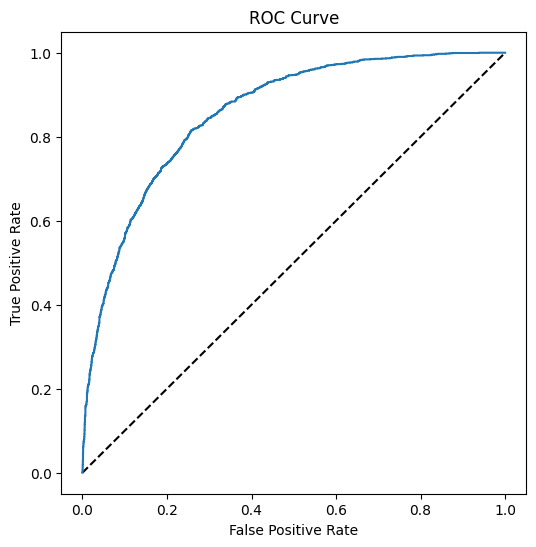

In [21]:


fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

O gráfico ROC mostra a curva das taxas de verdadeiro e falso positivo para diferentes valores de limite entre 0 e 1. Um classificador perfeito teria uma curva que vai direto para o lado esquerdo e direto para o topo. A linha diagonal no gráfico representa a probabilidade de prever corretamente com uma previsão aleatória de 50/50 - você quer que a curva seja maior do que isso (ou seu modelo não é melhor do que simplesmente adivinhar!).

A área sob a curva (AUC) é um valor entre 0 e 1 que quantifica o desempenho geral do modelo. Quanto mais próximo de 1 for esse valor, melhor será o modelo. O Scikit-Learn inclui uma função para calcular essa métrica, roc_auc_score.

In [22]:


auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568301125198085


Realizar pré-processamento em um pipeline
Neste caso, a curva ROC e sua AUC indicam que o modelo tem melhor desempenho do que um palpite aleatório, o que não é ruim, considerando que realizamos muito pouco pré-processamento dos dados.

Na prática, é comum realizar algum pré-processamento dos dados para facilitar o algoritmo a ajustar um modelo a eles. Há uma grande variedade de transformações de pré-processamento que você pode realizar para preparar seus dados para modelagem, mas nos limitaremos a algumas técnicas comuns:

Escalonar recursos numéricos para que fiquem na mesma escala. Isso evita que recursos com valores grandes produzam coeficientes que afetem desproporcionalmente as previsões.
Codificação de variáveis ​​categóricas. Por exemplo, usando uma técnica de codificação one-hot, você pode criar recursos binários individuais (verdadeiro/falso) para cada valor de categoria possível.
Para aplicar essas transformações de pré-processamento, usaremos um recurso do Scikit-Learn chamado pipelines. Os pipelines nos permitem definir um conjunto de etapas de pré-processamento que terminam com um algoritmo. Você pode então aplicar todo o pipeline aos dados, para que o modelo encapsule todas as etapas de pré-processamento, bem como o algoritmo de regressão. Isso é útil, porque quando queremos usar o modelo para prever valores de novos dados, precisaremos aplicar as mesmas transformações (com base nas mesmas distribuições estatísticas e codificações de categoria usadas com os dados de treinamento

In [23]:



numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [7]
categorical_transformer = Pipeline(steps=[('onehot',
              OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg,solver="liblinear" )
)])

model = pipeline.fit(X_train,(y_train))
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy:  0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202442751333613


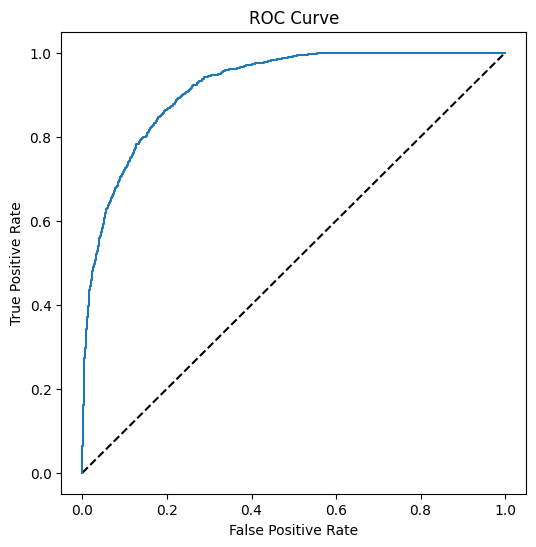

In [24]:
predictions = model.predict(X_test)
y_scores= model.predict_proba(X_test)

cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy: ', accuracy_score(y_test, predictions))
print("Overall Precision:", precision_score(y_test, predictions))
print("Overall Recall:", recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))


fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])


fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [25]:


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('loggregressor', RandomForestClassifier(n_estimators=100))
                           ])
model = pipeline.fit(X_train, y_train)
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('loggregressor', RandomForestClassifier())])


Confusion Matrix:
 [[2862  124]
 [ 179 1335]] 

Accuracy:  0.9326666666666666
Overall Precision: 0.9150102810143934
Overall Recall: 0.881770145310436

AUC: 0.9820750910678719


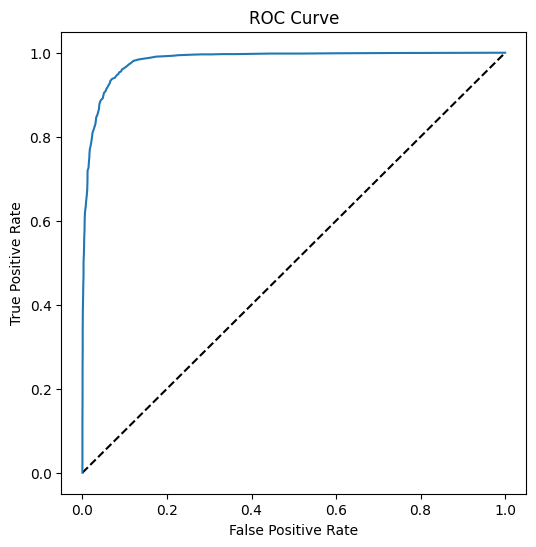

In [26]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix (y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print("Accuracy: ", accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])


fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [27]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.98 0.02]
 [0.99 0.01]
 [0.02 0.98]
 ...
 [0.   1.  ]
 [0.07 0.93]
 [0.48 0.52]]


In [28]:


filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

In [29]:

model = joblib.load(filename)


X_new = np.array([[2,100,74,24,25,13.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)


print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 100.0, 74.0, 24.0, 25.0, 13.9091702, 1.488172308, 22.0]
Predicted class is 0
